In [2]:
import tensorflow as tf
tf.__version__

'2.17.0'

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
sales_df = pd.read_csv('Bases de dados/Deep Learning Prático com TensorFlow e Python/Bases/SalesData.csv')
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [16]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [20]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


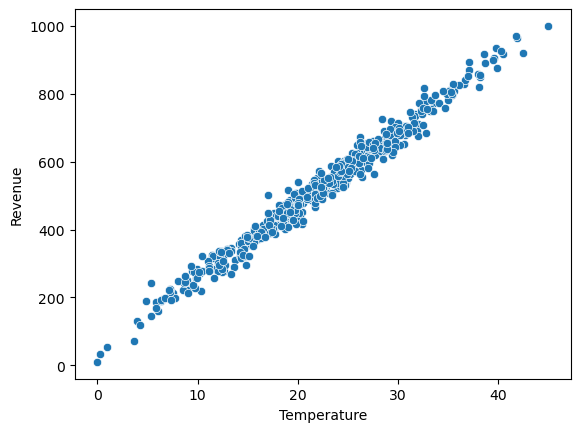

In [28]:
sns.scatterplot(x = sales_df['Temperature'], y = sales_df['Revenue']);

In [30]:
x_train = sales_df['Temperature']
y_train = sales_df['Revenue']

In [32]:
x_train.shape

(500,)

In [34]:
y_train.shape

(500,)

In [104]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[1]))

# Adicionando uma camada densa com 1 unidade
model.add(tf.keras.layers.Dense(units=50))
model.add(tf.keras.layers.Dense(units=3))

In [106]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253 (1012.00 B)

 Trainable params: 253 (1012.00 B)

 Non-trainable params: 0 (0.00 B)

In [108]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [110]:
epochs_hist = model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 171220.3281   
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 12690.0977
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1945.5470 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 1111.5482
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 754.3388
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 668.6570
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - loss: 630.0633
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - loss: 785.2745
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 727.6294
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 695.0396
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 685.0131
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 616.3334
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 638.3562
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 904us/step - loss: 693.0566
Epoch 15

In [112]:
epochs_hist.history.keys()

dict_keys(['loss'])

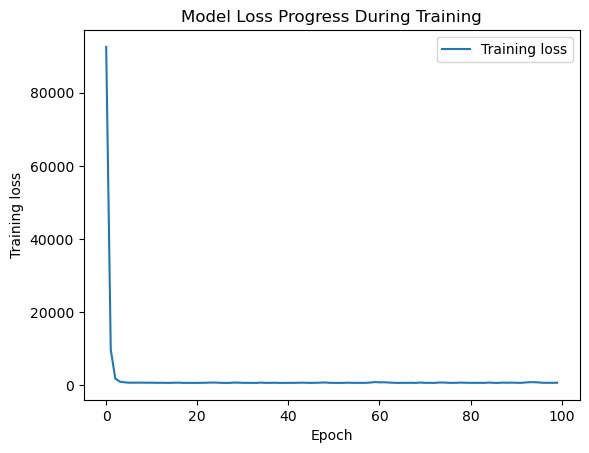

In [114]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss']);

In [116]:
model.get_weights()

[array([[ 7.2889751e-01, -5.5866282e-02,  1.6231621e-02,  1.7530908e-01,
         -8.2040334e-01,  1.1043437e-02, -2.6869090e-02, -5.7215261e-01,
          8.0342293e-03, -5.8465791e-01,  4.8623604e-04, -1.4616762e-01,
         -9.3574166e-01,  7.4414778e-01,  1.1139194e+00,  3.8916197e-01,
         -5.8668715e-01,  1.1379724e-01, -9.9792788e-03, -1.8654777e-02,
          9.5234746e-01,  4.2974859e-02,  1.0079535e+00,  3.5455830e-02,
          9.1379011e-01, -5.2910969e-03,  9.1945855e-03, -9.0351272e-01,
         -9.1466886e-01, -9.4154763e-01, -9.9092430e-01, -6.6542649e-01,
         -1.1391853e+00, -8.5804224e-01, -6.5950781e-01, -7.6711106e-01,
          8.9929199e-01, -7.3696870e-01, -6.2843233e-02,  9.2947209e-01,
         -4.4381145e-01,  9.6787210e-04, -8.9720511e-01,  6.7986131e-01,
         -3.5441238e-01,  3.1908648e-04,  7.9928249e-01, -1.2348073e+00,
         -3.4302214e-01,  4.9565244e-02]], dtype=float32),
 array([ 1.6222677e+00, -3.3158952e-01, -4.5621726e-01,  6.043965

In [124]:
temp = np.array([5])  # Convertendo para numpy array
revenue = model.predict(temp)

# Exibindo a previsão
print('Revenue Prediction =', revenue[0][0])




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Revenue Prediction = 148.99255
